# Домашняя работа №2

### Выполнил Кузнецов С.И.

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

**Ответ:**

Генеральной совокупностью называется совокупность **всех** рассматриваемых объектов.

Выборка - это **часть** генеральной совокупности, охватываемая экспериментом.

**Пример:** Мы хотим узнать средний рост жителей России.

В этом случае:

**Генеральная совокупность** - все жители России.

**Выборка** - случайно выбранный каждый 10 000й житель из каждого региона России.

- Если размер выборки больше 200, то такая выборка является репрезентативной?

**Ответ:** В общем случае нет. Чтобы выборка была репрезентативной, необходимо чтобы она по своей структуре соответствовала генеральной совокупности.

**Пример:** Мы хотм узнать средний рост жителей России, а в качестве выборки возьмем всех баскетболистов из всех баскетбольных команд России. Эта выборка не будет репрезентативной, несмотря на то, что ее размер будет больше 200, т.к. средний рост баскетболистов явно выше среднего роста жителей России.

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

**Ответ:** Генеральной совокупностью могла являться:

1. Совокупность всех футболистов Франции.

2. Совокупность всех футболистов на ЧМ-2018.

3. Совокупность всех европейских футболистов, участвующих в чемпионатах мира по футболу в XIX веке.

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

**Ответ:** Примеры выборок:

1. Все дети, родившиеся 12 марта каждого года.
2. Все дети, родившиеся в мае в роддомах Волгограда, номера которых делятся на 10 без остатка.

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


In [2]:
# Распределение, у которой отсутствует мода - равномерное распределение на отрезке [a, b].

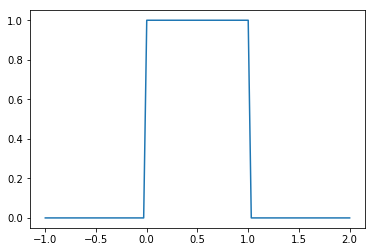

In [3]:
# Плотность равномерного распределения на отрезке [0, 1]
uniform_rv = stats.uniform(0, 1)

x = np.linspace(-1, 2, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

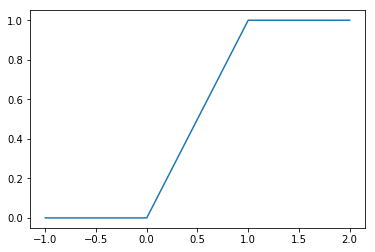

In [4]:
# Функция нормального распределения на отрезке [0, 1]
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [5]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()

#your code here
overshoot = np.array([200, 500])  # Выброс
sample_with_overshoot = np.hstack((sample, overshoot))  # Объединяем выборки

# Рассчитываем статистики
new_med = sorted(sample_with_overshoot)[25]
new_mean = sample_with_overshoot.mean()

# Вывод результатов
print('mean = {:.4f}, mean_with_overshoot = {:.4f}'.format(mean, new_mean))
print('med = {:.4f}, med_with_overshoot = {:.4f}'.format(med, new_med))

mean = 3.9304, mean_with_overshoot = 16.9896
med = 3.5886, med_with_overshoot = 3.6075


**Вывод:** Медиана более устойчива к выбросам, чем среднее

- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [6]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
mean_with_c = (sample + C).mean() 
mean_mult_c = (sample * C).mean()

print(' mean = {:.2f}\n mean_with_c = {:.2f}\n mean_mult_c = {:.2f}'.format(mean, mean_with_c, mean_mult_c))

 mean = 1.90
 mean_with_c = 2.40
 mean_mult_c = 0.95


**Вывод:**
- При добавлении константы к выборке матождание увеличивается на эту константу.
- При умножении выборки на константу матожидание умножается на эту константу.

- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [7]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = np.array([200, 500])  # Выброс
sample_with_overshoot = np.hstack((sample, overshoot))  # Объединяем выборки
new_var = sample_with_overshoot.var() # Новая дисперсия

# Вывод результатов
print('var = {:.4f}, var_with_overshoot = {:.4f}'.format(var, new_var))

var = 1.0549, var_with_overshoot = 5263.6704


**Вывод:** Дисперсия неустойчива к выбросам. Поэтому, при расчете дисперсии необходимо избавляться от выбросов

- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, 
\sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [8]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)

#your code here

x_25 = sorted(sample)[249]
x_75 = sorted(sample)[749]
var = sample.var() ** 0.5

print(' x_75 - x_25 = {:.4f} \n length((mean - s, mean + s)) = {:.4f}'.format(x_75 - x_25, 2 * var))

 x_75 - x_25 = 1.3814 
 length((mean - s, mean + s)) = 2.0411


**Вывод:** Для нормального распределения **интервал $(\bar{X}-s, \bar{X}+s)$ шире интерквантильного размаха**, так как в интервал $(\bar{X}-s, \bar{X}+s)$ попадает 68,27% выборки, а в интерквантильный размах ($X_{0.75} - X_{0.25}$) 50% выборки по определению интерквантильного размаха.

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [9]:
beta_rv = stats.beta(1,3)

# Статистикой называется  измеримая числовая функция от выборки,
## не зависящая от неизвестных параметров распределения элементов выборки.

# Пример: медиана.
# Рассчитаем медиану для выборки из 100 элементов. 

sample = beta_rv.rvs(100)  # Выборка
rank = sorted(sample)
med = (rank[49] + rank[50]) / 2
print('med = {:.4f}'.format(med))

med = 0.1884


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

**Ответ:** Формулы оценки матожидания, медианы и дисперсии
$$\bar{X} = \frac 1n \sum_i X_i $$

$$m = \begin{cases}
X_{(n / 2)},\ n = 2k \\
\dfrac{X_{(n / 2)} + X_{(n / 2) + 1}}{2},\ n = 2k + 1 \\
\end{cases}$$

$$s^2 = \frac{1}{n-1} \sum_i (X_i - \bar{X})^2 $$

In [10]:
gamma_rv = stats.gamma(2,2)

#your code here
sample = gamma_rv.rvs(100)

mean = sum([i for i in sample]) / len(sample)
var = sum([(i - mean) ** 2 for i in sample]) / (len(sample) - 1)
rank = sorted(sample)
med = (rank[len(sample) // 2 - 1] + rank[len(sample) // 2]) / 2

print('mean = {:.4f}'.format(mean))
print('var = {:.4f}'.format(var))
print('med = {:.4f}'.format(med))

mean = 3.9309
var = 2.1071
med = 3.5477


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

**Ответ:** В соответствии с ЦПТ $\bar{X}$ стремится к нормальному распределению.

Математическое ожидание будет стремиться к выборочному среднему:
$$\bar{X} = \frac 1n \sum_i X_i $$

Дисперсия будет стремиться к выборочной дисперсии:
$$s^2 = \frac{1}{n-1} \sum_i (X_i - \bar{X})^2 $$

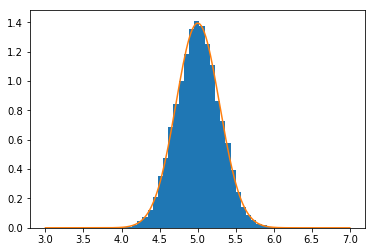

In [11]:
#your code here
norm_rv = stats.norm(5,2)

x_means = list()

for i in range(10000):
    sample = norm_rv.rvs(50)
    x_means.append(sample.mean())
    
# Оценим параметры распределения:
x_means = np.array(x_means)

x_means_mean = x_means.mean()  # Мат. ожидание
x_means_var = x_means.var()  # Дисперсия

x = np.linspace(3, 7, 200)

res = plt.hist(x = x_means, density = True, bins = 30)
pdf = stats.norm(loc=x_means_mean, scale=x_means_var ** 0.5).pdf(x)
plt.plot(x, pdf)


- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

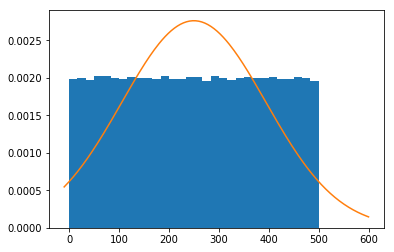

In [12]:
# ЦПТ выполняется для одинаково распределенных независимых случайных величин.
# Пусть в нашем примере случайные величины будут распределены по-разному.

x_means = list()

for i in range(10000):
    norm_rv = stats.norm(0.05 * i, 2) # Случайные величины имеют разное распределение
    sample = norm_rv.rvs(50)
    x_means.append(sample.mean())
    
# Оценим параметры распределения:
x_means = np.array(x_means)

x_means_mean = x_means.mean()  # Мат. ожидание
x_means_var = x_means.var()  # Дисперсия

x = np.linspace(-10, 600, 200)

res = plt.hist(x = x_means, density = True, bins = 30)
pdf = stats.norm(loc=x_means_mean, scale=x_means_var ** 0.5).pdf(x)
plt.plot(x, pdf)


- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [13]:
expon_rv = stats.expon(3)

# Сделаем выборку из 10000 элементов
sample = expon_rv.rvs(10000)

# Вычислим параметры распределения
mean = sample.mean()
var = sample.var()
print('Матожидание = {:.4f}, дисперсия = {:.4f}'.format(mean, var))

sample_z = (sample - mean) / (var ** 0.5)
mean_z = sample_z.mean()
var_z = sample_z.var()

print('Новое матожидание = {:.4f}, новая дисперсия = {:.4f}'.format(mean_z, var_z))

Матожидание = 3.9831, дисперсия = 0.9466
Новое матожидание = 0.0000, новая дисперсия = 1.0000


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [14]:
#your code here
print('Interval: (0, {:.4f})'.format(stats.chi2(10).ppf(.9)))

Interval: (0, 15.9872)


- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [15]:
#your code here
print('Interval 90%: ({:.4f}, {:.4f})'.
      format(stats.nct(nc = 0, df = 15).ppf((1 - .9) / 2), stats.nct(nc = 0, df = 15).ppf((1 + .9) / 2)))
print('Interval 95%: ({:.4f}, {:.4f})'.
      format(stats.nct(nc = 0, df = 15).ppf((1 - .95) / 2), stats.nct(nc = 0, df = 15).ppf((1 + .95) / 2)))

Interval 90%: (-1.7531, 1.7531)
Interval 95%: (-2.1314, 2.1314)


**Ответ:** Интервал с уровнем доверия 95% шире, чем с уровнем доверия 90%

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [16]:
norm_rv = stats.norm(0, 2)

#your code here

# Выборка из 50 элементов
sample_50 = norm_rv.rvs(50)
mean_50 = sample_50.mean()
var_50 = sample_50.var()
SE_50 = (var_50 / 50) ** 0.5

half_int_50 = stats.norm(0, 1).ppf((1 + 0.9) / 2) * SE_50
print('Interval 90% n = 50: ({:.4f}, {:.4f})'.
      format(mean_50 - half_int_50, mean_50 + half_int_50))


# Выборка из 100 элементов
sample_100 = norm_rv.rvs(100)
mean_100 = sample_100.mean()
var_100 = sample_100.var()
SE_100 = (var_100 / 100) ** 0.5

half_int_100 = stats.norm(0, 1).ppf((1 + 0.9) / 2) * SE_100
print('Interval 90% n = 100: ({:.4f}, {:.4f})'.
      format(mean_100 - half_int_100, mean_100 + half_int_100))


Interval 90% n = 50: (-0.6421, 0.3828)
Interval 90% n = 100: (-0.1582, 0.4777)


**Ответ:** Чем больше выборка, тем уже доверительный интервал, т.к. стандартная ошибка $SE \sim \cfrac{1}{\sqrt{n}}$

- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

**Ответ:** Мы совершили ошибку второго рода, т.к. неверно приняли основную гипотезу (сделали ложноотрицательный вывод).

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


**Ответ:** 
- Первое утверждение неверное. Если p = 0.003, то вероятность нашего наблюдения при условии истинности основной гипотезы равно 0,003. 
- Второе утверждение неверное, т.к. мы при проверке гипотез проверяем вероятность нашего наблюдения при условии, что верна основная гипотеза. Правильно было бы сформулировать так: "Нет оснований отклонять основную гипотезу на данном этапе".
- Третье утверждение спорное, т.к. непонятно, что значит, одна гипотеза лучше другой. Я бы сформулировал так: "Чем меньше уровень значимости, тем меньше вероятность нашего наблюдения при условии истинности основной гипотезы".

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

**Ответ:** Если отклонять основную гипотезу более рискованно, то я бы выбрал меньший уровень значимости, т.е. 0.01.

Насчет размера доверительного интервала. Зависит от цены ошибки в контексте конкретной задачи. Если речь идет, например, о новых сильнодействующих лекарственных препаратах, которые могут убить человека при неправильном применении, то и 99.0% мало. Но в большинстве практических задач вполне достаточно 99%.

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

Text(0.5, 0, '$x$')

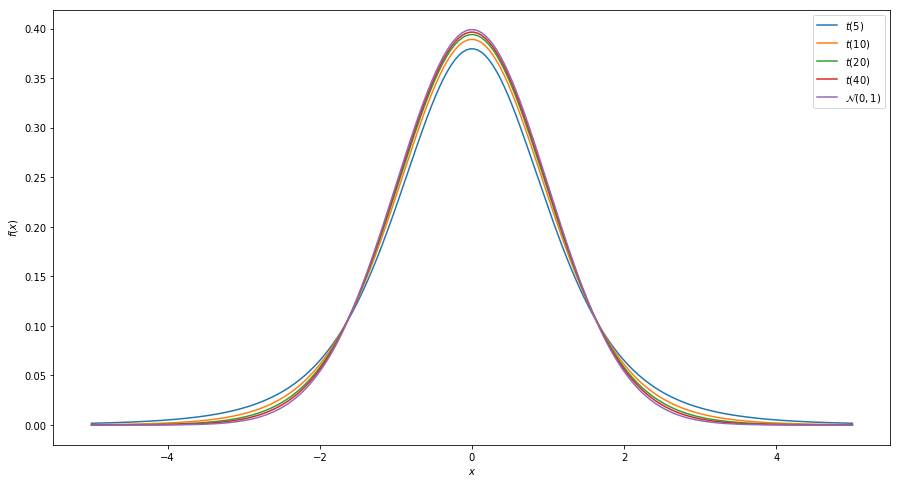

In [17]:
# зададим нормально распределенную случайную величину
student_5_rv = stats.nct(nc = 0, df = 5)
student_10_rv = stats.nct(nc = 0, df = 10)
student_20_rv = stats.nct(nc = 0, df = 20)
student_40_rv = stats.nct(nc = 0, df = 40)
norm_rv = stats.norm(0, 1)

x = np.linspace(-5,5,200)
pdf_student_5 = student_5_rv.pdf(x)
pdf_student_10 = student_10_rv.pdf(x)
pdf_student_20 = student_20_rv.pdf(x)
pdf_student_40 = student_40_rv.pdf(x)
pdf_norm = norm_rv.pdf(x)

plt.figure(figsize=(15,8))
plt.plot(x, pdf_student_5)
plt.plot(x, pdf_student_10)
plt.plot(x, pdf_student_20)
plt.plot(x, pdf_student_40)
plt.plot(x, pdf_norm)

plt.legend(['$t(5)$',  '$t(10)$', '$t(20)$', '$t(40)$', '$\mathcal{N}(0,1)$'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


**Выводы:** Чем меньше число степеней свободы, тем "шире" и "ниже" график функции плотности распределения Стьюдента. С увеличением числа степеней свободы распределение Стьюдента приближаетя к нормальному распределению.

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

corr = -1.0


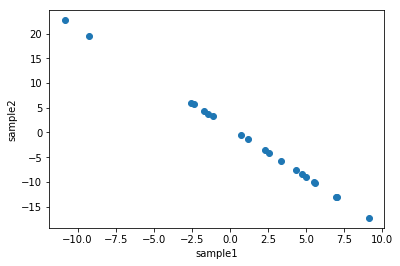

In [18]:
sample1 = stats.norm(0, 5).rvs(20)
sample2 = - sample1 * 2 + 1

x = np.linspace(0,20,21)

plt.plot(sample1, sample2, 'o')

plt.ylabel('sample2')
plt.xlabel('sample1')

print('corr = {}'.format(np.corrcoef(sample1, sample2)[0, 1]))

**Вывод:** Из равенства корреляции $\pm 1$ следует линейная зависимость между случайными величинами. 

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

corr = 0.019189278585765527


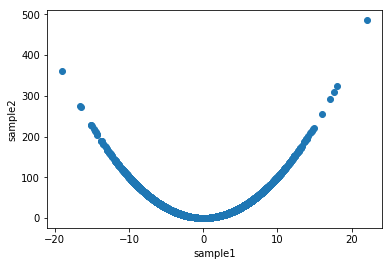

In [19]:
sample1 = stats.norm(0, 5).rvs(5000)
sample2 = sample1 ** 2

x = np.linspace(0,20,21)

plt.plot(sample1, sample2, 'o')

plt.ylabel('sample2')
plt.xlabel('sample1')

print('corr = {}'.format(np.corrcoef(sample1, sample2)[0, 1]))

**Вывод:** Из равенства корреляции 0 **не следует** независимость случайных величин. 

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [20]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

#your code here
data = list(enumerate(sorted(list(sample_1) + list(sample_2))))

sum_1 = sum_2 = 0
for elem in data:
    if elem[1] in sample_1:
        sum_1 += elem[0]
    else:
        sum_2 += elem[0]
        
print('Ранг первой выборки: {}, ранг второй выборки: {}.'.format(sum_1, sum_2))            


Ранг первой выборки: 10109, ранг второй выборки: 9791.
